## Интервальные оценки честности ромашек

Сегодня прочитал как Матвей тестировал четности лепестков ромашки https://vk.com/wall-78542900_124
Как всегда все довольно интересно. Но автор почему-то сделал только точечную оценку и остановился на ней. Мне же стало интересно сделать еще интервальные оценки. Старался писать понятные объяснения своими словами.

In [1]:
import numpy as np
import seaborn as sns
import scipy.stats as stats
%matplotlib inline

Четное количество лепестков у 20 ромашек, нечетное у 40. Но это малая выборка с большого ромашкового поля. Настоящая вероятность получить нечетное количество лепестков может отличаться. Рассмотрим поле из 6'000 ромашек, и нечет колчество лепестков у 4'000. И посмотрим какие выводы можно сделать, если сорвать 60 из них:

In [2]:
universe = np.concatenate([np.zeros(2000), np.ones(4000)])
sample = np.random.choice(universe, 60)
float(sample.sum()) / sample.size

0.75

Хотя должно было получиться:

In [3]:
float(universe.sum()) / universe.size

0.6666666666666666

Точечные оценки врут (хоть немного) очень часто. Интервальные только с определенной вероятностью. Природа сложна, но не злонамерена. Исследовав часть поля, мы с большой вероятностью можем сказать интервал истиной вероятности получения нечетного количества лепестков.

### Bootstrap

Сделаем быстрое оценивание с помощью бутстэпа. https://ru.wikipedia.org/wiki/Статистический_бутстрэп

In [4]:
sample = np.concatenate([np.zeros(20), np.ones(40)])

In [5]:
def point_est(sample):
    return float(sample.sum()) / sample.size

In [6]:
mean = point_est(sample)
mean

0.6666666666666666

In [7]:
def Choose(sample):
    return np.random.choice(sample, sample.size)

In [8]:
B_size = 10000
boot = np.vectorize(lambda it: point_est(Choose(sample)))(np.arange(B_size))

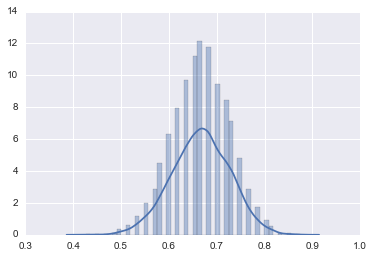

In [9]:
sns.distplot(boot)

Из имеющейся выборки я сгенерировал 10'000 выборок с возвращением такого же размера. Это похоже на следующий процесс. Пусть поле состоит из очень большого числа ромашек с тем количеством лепестков, которые есть в данных Матвея. И распределение на поле такое как в его выборке. И мы 10'000 раз моделируем процесс выбора 60 ромашек.

In [10]:
boot.mean()

0.66643166666666676

Среднее получилось почти как нужно. Но ценность не в нем, ценность в дисперсии, которой не было у точечной оценки, а теперь есть, благодаря bootstrap методу.

In [11]:
boot_mean = float(sample.sum()) / sample.size
boot_std = boot.std()

Рассмотрим любимый многими 95% доверительный интервал (вероятность, что истиное значение вероятности окажется вне интервала 5%). Немножко ЦПТ магии:

In [12]:
alpha = 0.05
level = 1. - alpha / 2
deviation = stats.norm.ppf(level) * boot_std
boot_mean - deviation, boot_mean + deviation

(0.54774557849887562, 0.78558775483445764)

Вот такой на самом деле широкий разброс получается. В любом случае, теперь мы на 95% уверены, что четность количества лепестков не равновероятна. Посмотрим насколько эту уверенность можно повысить.

In [13]:
stats.norm.cdf((boot_mean - .5) / boot_std)

0.99699164298525478

Шансы честного распределения четности менее 1%

### Да, можно гораздо проще

Bootstrap хорош. Но он ничего не знает о том, что мы там оценивали. С одной стороны это плюс. Можно не заморачиваясь оценивать сложные статистики.

С другой, если вдаться в детали, можно получить лучшую оценку. Естественно, например считать, что вероятность встретить нечетное количество лепестков на ромашке постоянна. Тогда это последовательность независимых испытаний Бернулли. Что очень похоже на правду. Но если это сделать сразу, не будет прикольной картинки.

In [14]:
p = float(sample.sum()) / sample.size
se = np.sqrt(p * (1. - p) / sample.size)

In [15]:
alpha = 0.05
level = 1. - alpha / 2
deviation = stats.norm.ppf(level) * se
p - deviation, p + deviation

(0.54738705708552282, 0.78594627624781044)

### Выводы

С большой долей уверенности можно сказать, что у ромашки скорее нечетное число лепестков, чем четное. Что, на мой взгляд, делает весь смысл игры "Любит - Не любит".